# Recurrent Neural Networks with Keras

## Sentiment Analysis from Movie Reviews

This notebook draws inspiration from the imdb_lstm.py example included with Keras.

It serves as an excellent illustration of RNNs. The dataset utilized contains user-generated movie reviews along with classifications indicating whether the user liked the movie based on its associated rating.

For more details on the dataset, refer to [this link](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification).

We're employing an RNN to conduct sentiment analysis on full-text movie reviews.

Consider the significance of this task. We're training an artificial neural network to comprehend movie reviews and infer whether the author enjoyed the movie.

Understanding written language entails maintaining a record of all the words in a sentence. Thus, we require a recurrent neural network to retain a "memory" of preceding words as it processes sentences over time.

Specifically, we'll utilize LSTM (Long Short-Term Memory) cells because we aim to preserve information from words encountered earlier in a sentence, as they can significantly influence its meaning.

Let's begin by importing the necessary components:


In [ ]:
# preprocessing module of the sequential model, so we can embed those different layers toghether
import numpy as np
import json
import random

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from keras.models import load_model
from tensorflow.keras.utils import plot_model

Importing the training and testing data, limiting to the top 20,000 most popular words for manageability.
The dataset comprises 25000 training reviews and 5000 testing reviews.



In [ ]:
# num_words: how many unique words that you want to load into your training and testing dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

# Get the word index
word_index = imdb.get_word_index(path="imdb_word_index.json")

# Reverse the word index to map indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


In machine learning, models typically operate with numerical data rather than words. Therefore, it's necessary to convert words to numbers as an initial step. Thankfully, Keras has already handled this pre-processing for us.


In [ ]:
x_train[1337],len(x_train[1337])

([1,
  3934,
  1659,
  2173,
  9,
  6,
  2,
  6282,
  8258,
  2930,
  8,
  521,
  18,
  2217,
  31,
  251,
  190,
  29,
  571,
  725,
  35,
  154,
  312,
  396,
  19275,
  773,
  2,
  2,
  4289,
  2065,
  9,
  35,
  3604,
  5,
  1344,
  1576,
  2133,
  19,
  6,
  1334,
  393,
  5,
  35,
  1724,
  1103,
  3934,
  9,
  9807,
  29,
  6261,
  2,
  8,
  413,
  27,
  5294,
  21,
  80,
  2,
  28,
  8,
  3552,
  41,
  8166,
  7,
  4374,
  11,
  4,
  182,
  7,
  2420,
  121,
  183,
  26,
  24,
  210,
  51,
  36,
  306,
  8,
  30,
  5,
  80,
  59,
  30,
  502,
  8,
  15144,
  4,
  2,
  7,
  6,
  2494,
  1776,
  19069,
  14,
  9,
  669,
  6,
  327,
  883,
  18,
  148,
  37,
  6467,
  2953,
  7,
  5499,
  3934,
  5,
  2,
  26,
  427,
  11,
  119,
  5,
  68,
  6158,
  5,
  2599,
  26,
  6,
  52,
  650,
  190,
  261,
  4,
  20,
  497,
  8,
  123,
  4,
  993,
  113,
  11,
  94,
  635,
  12,
  152,
  340,
  3115,
  14463,
  4,
  365,
  1234,
  26,
  312,
  5,
  4,
  229,
  9,
  55,
  14540,
  398,
  1

The labels in our dataset represent binary sentiment classifications, where 0 indicates a negative sentiment (the reviewer did not like the movie) and 1 indicates a positive sentiment (the reviewer liked the movie). These labels serve as the target variable for our sentiment analysis task.

In [ ]:
y_train[1337]

1

In summary, we're dealing with movie reviews represented as sequences of integers and corresponding binary sentiment classifications (0 or 1), indicating whether the reviewer liked the movie.

Given the potential computational complexity of RNNs, we'll constrain our analysis to the first 80 words of each review to maintain manageability on our PC.


In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)

Setting up a neural network model with Keras is surprisingly simple, even for a complicated architecture like LSTM recurrent neural networks.

We begin with an Embedding layer, which converts input data into dense vectors of fixed size. This is particularly useful for index-based text data like ours. We specify a vocabulary size of 20,000 and an output dimension of 128 units.

Next, we add an LSTM layer for the recurrent neural network itself. We set the output size to 128 to match the output of the Embedding layer, and include dropout terms to prevent overfitting, a common issue with RNNs.

Finally, we reduce it to a single neuron with a sigmoid activation function for binary sentiment classification (0 or 1).


In [ ]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

As this is a binary classification problem, we'll employ the binary_crossentropy loss function. The Adam optimizer is typically a good choice (although you can experiment with others).


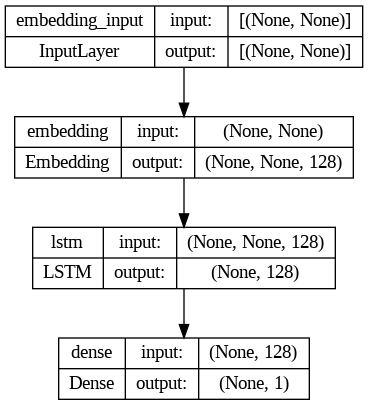

In [ ]:
# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Embedding Layer:
 - Converts integer indices representing words into dense vectors of fixed size.
 - Learns dense representations of words, capturing semantic relationships.
 - Helps the model understand contextual meaning of words in the input sequence.
model.add(Embedding(20000, 128))

# LSTM Layer:
 - Processes sequential data, capturing temporal dependencies between words.
 - Capable of learning long-term dependencies in sequential data.
 - Dropout and recurrent dropout parameters prevent overfitting.
 - Effectively captures contextual information and sequential patterns.
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Dense Layer:
 - Standard fully connected layer that performs classification/regression.
 - Applies a linear transformation followed by an activation function.
 - Learns complex decision boundaries based on features learned by preceding layers.
 - Outputs a probability score indicating likelihood of input sequence belonging to a class.
model.add(Dense(1, activation='sigmoid'))


Now we're ready to train our model. RNNs, like CNNs, are resource-intensive. Maintaining a small batch size is crucial for running this on your PC. To scale better, leverage GPUs across computers in a cluster.

## Warning

Executing the next blocks will take a long time, even on a fast PC! Proceed only if you're willing to tie up your computer for an hour or more.


Now let's kick off the training. Even with a GPU, this will take a long time!

In [ ]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=15,
          verbose=2,
          validation_data=(x_test, y_test))

Epoch 1/15
782/782 - 230s - loss: 0.4232 - accuracy: 0.8014 - val_loss: 0.3863 - val_accuracy: 0.8368 - 230s/epoch - 294ms/step
Epoch 2/15
782/782 - 212s - loss: 0.2524 - accuracy: 0.8991 - val_loss: 0.3737 - val_accuracy: 0.8365 - 212s/epoch - 271ms/step
Epoch 3/15
782/782 - 208s - loss: 0.1675 - accuracy: 0.9380 - val_loss: 0.5574 - val_accuracy: 0.8138 - 208s/epoch - 265ms/step
Epoch 4/15
782/782 - 207s - loss: 0.1089 - accuracy: 0.9610 - val_loss: 0.6462 - val_accuracy: 0.8138 - 207s/epoch - 264ms/step
Epoch 5/15
782/782 - 211s - loss: 0.0756 - accuracy: 0.9741 - val_loss: 0.6275 - val_accuracy: 0.8166 - 211s/epoch - 270ms/step
Epoch 6/15
782/782 - 211s - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.6423 - val_accuracy: 0.8027 - 211s/epoch - 270ms/step
Epoch 7/15
782/782 - 208s - loss: 0.0460 - accuracy: 0.9849 - val_loss: 0.7061 - val_accuracy: 0.8141 - 208s/epoch - 266ms/step
Epoch 8/15
782/782 - 208s - loss: 0.0244 - accuracy: 0.9924 - val_loss: 1.0513 - val_accuracy: 0.8134 - 

OK, let's evaluate our model's accuracy:

In [ ]:
# Save the model
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
model = load_model('my_model.h5')

In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 - 20s - loss: 1.0490 - accuracy: 0.8096 - 20s/epoch - 25ms/step
Test score: 1.0490118265151978
Test accuracy: 0.8096399903297424


Achieving an accuracy of 81% is quite commendable, especially considering the limitation to just the first 80 words of each review. However, it's noteworthy that the validation accuracy plateaued early in training, indicating overfitting. Employing early stopping could have mitigated this issue effectively.

Nevertheless, the accomplishment is significant. We've developed a neural network capable of discerning the sentiment of movie reviews based solely on text. The model comprehends the context and positioning of words within each review, showcasing the power of Keras. Remarkably, setting up the model required only a few lines of code. It's a testament to the remarkable capabilities afforded by modern machine learning frameworks.


In [ ]:
x_test[0],len(x_test[0])

(array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,   591,   202,    14,    31,     6,
          717,    10,    10, 18142, 10698,     5,     4,   360,     7,
            4,   177,  5760,   394,   354,     4,   123,     9,  1035,
         1035,  1035,    10,    10,    13,    92,   124,    89,   488,
         7944,   100,    28,  1668,    14,    31,    23,    27,  7479,
           29,   220,   468,     8,   124,    14,   286,   170,     8,
          157,    46,     5,    27,   239,    16,   179, 15387,    38,
           32,    25,  7944,   451,   202,    14,     6,   717],
       dtype=int32),
 80)

In [ ]:

def decode_review(review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

for _ in range(5):  # Loop 5 times

    # Choose a random index within the range of the dataset
    i = random.randint(0, len(x_test) - 1)

    # Decode the original review from the tokenized format to words
    original_review = decode_review(x_test[i])

    # Get the corresponding ground truth label
    ground_truth_label = y_test[i]

    # Predict using the model
    predictions = model.predict(np.expand_dims(x_test[i], axis=0))

    # Assuming your model outputs probabilities for each class
    predicted_label = np.argmax(predictions)

    print('\n\nExample', i+1)
    print('Original Review:', original_review)
    print('Ground Truth Label:', ground_truth_label)
    print('Predicted Label:', predicted_label)


1/1 [==============================] - 0s 450ms/step


Example 5023
Original Review: the bbc creates one of their smart sensible period masterpieces like pride prejudice with colin ? which speaking for what i imagine in my opinion austen would have revered the bbc would never dare ? cheesy saxophone ? and ? girl over a shot of an historic castle and a loving embrace foster seemed to be often confused that they were editing the music to the specialist if you want austen as you love her look for the bbc logo
Ground Truth Label: 0
Predicted Label: 0
1/1 [==============================] - 0s 62ms/step


Example 365
Original Review: in length 'the english ? wonderfully evokes memories of the classic romantic epics of old successfully finding a balance of mystery love joy and tragedy the ending of the film is heartbreaking and ? but also uplifting in its own way whilst some romantic relationships are doomed from the very beginning others have a very good chance of bringing happiness neverthe

In [ ]:

def decode_review(review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

for _ in range(5):  # Loop 5 times

    # Choose a random index within the range of the dataset
    i = random.randint(0, len(x_test) - 1)

    # Decode the original review from the tokenized format to words
    original_review = decode_review(x_test[i])

    # Get the corresponding ground truth label
    ground_truth_label = y_test[i]

    # Predict using the model
    predictions = model.predict(np.expand_dims(x_test[i], axis=0))

    # Assuming your model outputs probabilities for each class
    predicted_label = np.argmax(predictions)

    print('\n\nExample', i+1)
    print('Original Review:', original_review)
    print('Ground Truth Label:', ground_truth_label)
    print('Predicted Label:', predicted_label)


1/1 [==============================] - 0s 38ms/step


Example 10466
Original Review: did anyone stop to think and take notice that the girl who took her life wasn't actually one of those six as one comment points out she had screen time of maybe max excluding the final scenes i think the point of the film is not only to make an issue of teenage angst and how far it can take someone but also that it is no apparently obvious who is always in danger of committing such an act suicide
Ground Truth Label: 1
Predicted Label: 0
1/1 [==============================] - 0s 36ms/step


Example 8160
Original Review: simplistic and horrible stereotypes i have seen yet on screen and the acting isn't very good save for the father who portrays a stereotypical beer drinking sport loving american idiot perfectly br br poor acting unbelievable characters and jokes that don't catch you off guard detract from this show to a point of where it is unwatchable if you don't have cable and would like to see a come